<a href="https://colab.research.google.com/github/GraceOby/Hamoye/blob/main/StageC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/HAMOYE-Internship/Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#Since stab and stabf our target variable says same, we drop stab
df = df.drop(columns="stab")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [4]:
#First we then convert our target variable stabf to binary 0 and 1 using labelEncoder

#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.stabf = encoder.fit_transform(df.stabf)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [5]:
X = df.drop(columns='stabf')
y = df['stabf']

In [6]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
x_train.shape, x_test.shape

((8000, 12), (2000, 12))

In [9]:
#Next we scale x_train and : our train set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_x_train = scaler.fit_transform(x_train)
normalised_x_train = pd.DataFrame(normalised_x_train, columns=x_train.columns)


In [10]:
#we scale our x_test
normalised_x_test = scaler.transform(x_test)
normalised_x_test = pd.DataFrame(normalised_x_test, columns=x_test.columns)


In [11]:
pip install xgboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [14]:
# Put models in a dictionary
models = {"Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(), 
          "XGBoost": XGBClassifier(),
          "GBM": LGBMClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(1)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [15]:
model_scores = fit_and_score(models=models,
                             x_train=normalised_x_train,
                             x_test=normalised_x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Random Forest': 0.929,
 'Decision Tree': 0.8505,
 'XGBoost': 0.9195,
 'GBM': 0.9415}

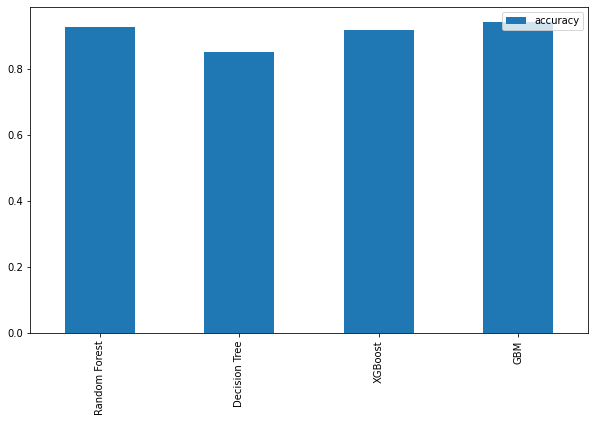

In [16]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar', figsize=(10,6))

In [18]:
np.random.seed(1)
models["Random Forest"].fit(normalised_x_train, y_train)
models["Random Forest"].score(normalised_x_test, y_test)

0.929

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier()



In [26]:
tree.fit(normalised_x_train, y_train)

DecisionTreeClassifier()

AttributeError: ignored